In [65]:
# Проверка работоспособности системы
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
print(tf.__version__)

# Проверка подключения графического процессора
print("Доступные устройства GPU:")
for device in tf.config.experimental.list_physical_devices():
    print(device)

os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

2.15.0
Доступные устройства GPU:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


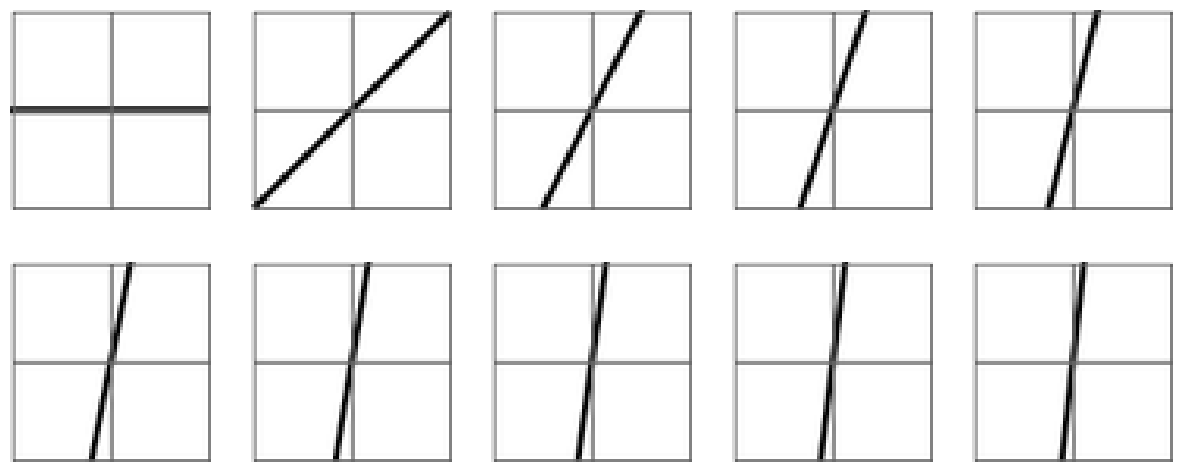

In [66]:
### Просмотр файлов папки датасета ###

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def show_image_gallery(images, cols=2):
    n_images = len(images)
    nrows = (n_images + cols - 1) // cols  # Calculate rows needed
    
    fig, axes = plt.subplots(nrows, cols, figsize=(15, nrows * 3))
    for i, ax in enumerate(axes.flat):
        if i < n_images:
            ax.imshow(images[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

# Путь к папке с изображениями
folder_path = "C:\\WORK_DIRECTORY\\7_СЕМ\\Курсовая работа 7 сем\\TF_регрессия\\datasets\\dataset_1\\train"
images = load_images_from_folder(folder_path)

show_image_gallery(images, cols=5)

In [67]:
### Создание датасета из файлов ###

# Создание датасета для обучения

# Функции загрузки и предобработки к каждому элементу датасета
def load_and_preprocess_train_image(image_path, label):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_png(img, channels=1)  # Черно-белые изображения
        img = tf.image.resize(img, [64, 64])
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img, label

# Функция, которая создает датасет из папки с изображениями
def import_train_data(image_dir):
    # Получение списка файлов с изображениями
    image_files = []
    # for papka in os.listdir(image_dir):
    #     papka_dir = image_dir + '/' + papka
    #     for file in os.listdir(papka_dir):
    #         if file.endswith('.png'):
    #             image_files.append(os.path.join(papka_dir, file))
    
    for file in os.listdir(image_dir):
            if file.endswith('.png'):
                image_files.append(os.path.join(image_dir, file))

   
    print("Количество изображений:",len(image_files))
   
    # Создание списка меток 
    labels = []
    dict_labels = dict()
    for i in range(0, len(image_files)):
         # Создание индекса графика
        label = int(image_files[i].split(".png")[0].split("\\")[1])
        labels.append(i)
        dict_labels[label] = i

    print(dict_labels)
    print("Количество меток:",len(set(labels)))
    print("Распределение меток:",labels)

    # Создание датасета с использованием tf.data.Dataset.from_tensor_slices
    dataset = tf.data.Dataset.from_tensor_slices((image_files, labels))
    
    # Применение функции загрузки и предобработки к каждому элементу датасета
    dataset = dataset.map(load_and_preprocess_train_image)
    
    return dataset, dict_labels, len(dict_labels)


# Путь к папке с изображениями для обучения
train_image_dir = "C:/WORK_DIRECTORY/7_СЕМ/Курсовая работа 7 сем/TF_регрессия/datasets/dataset_1/train"



train_dataset, train_kodificator, output_classes = import_train_data(train_image_dir)

batch_size = 1  # Количество изображений подаваемых нейросети за одну итерацию обучения
train_dataset = train_dataset.batch(batch_size)
print("Кодификатор: ", train_kodificator)
print("Длина кодификатора: ", len(train_kodificator))
print("Количество классов: ", output_classes)



Количество изображений: 10
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Количество меток: 10
Распределение меток: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Кодификатор:  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Длина кодификатора:  10
Количество классов:  10


In [68]:
### СОЗДАНИЕ МОДЕЛИ СЕТИ ### 

from tensorflow.keras import layers, models

# Определяем параметры входных данных
input_shape = (64, 64, 1)  # 64x64 пикселя, 3 канала (RGB) - если это изображение

# Создание трёхслойной модели персептрона
model = models.Sequential()

# Входной слой (преобразование изображения в плоский вектор)
model.add(layers.Flatten(input_shape=input_shape))

# Первый скрытый слой с 128 нейронами и активацией ReLU
model.add(layers.Dense(128, activation='relu'))

# Второй скрытый слой с 64 нейронами и активацией ReLU
model.add(layers.Dense(64, activation='relu'))

# Выходной слой с одним нейроном для регрессии (непрерывное значение)
model.add(layers.Dense(1))

# Компиляция модели с функцией потерь для регрессии и оптимизатором Adam
model.compile(optimizer='adam', loss='mse')

# Вывод структуры модели
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 4096)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               524416    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 532737 (2.03 MB)
Trainable params: 532737 (2.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
### ОБУЧЕНИЕ СЕТИ ###

# Определение пути для сохранения модели
checkpoint_filepath = 'best_model2.h5'

# Настройка коллбека ModelCheckpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,         # путь для сохранения модели
    monitor='val_loss',                   # метрика для мониторинга (здесь - валидационная функция потерь)
    save_best_only=True,                  # сохранять только лучшую модель
    save_weights_only=False,              # сохранять не только веса, но и всю модель
    mode='min',                           # искать минимальное значение метрики
    verbose=1                             # выводить информацию о сохранении
)

history = model.fit(train_dataset,
                    epochs=1000, 
                    batch_size=1,
                    validation_data=train_dataset,
                    callbacks=[checkpoint])


Epoch 1/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1063031.3750
Epoch 1: val_loss improved from inf to 100024.96094, saving model to best_model2.h5
10/10 [==============================] - 2s 31ms/step - loss: 966988.3750 - val_loss: 100024.9609
Epoch 2/1000
 9/10 [==========================>...] - ETA: 0s - loss: 33559.4219
Epoch 2: val_loss improved from 100024.96094 to 126.31844, saving model to best_model2.h5
10/10 [==============================] - 0s 17ms/step - loss: 30806.9590 - val_loss: 126.3184
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 11106.3252
Epoch 3: val_loss did not improve from 126.31844
10/10 [==============================] - 0s 13ms/step - loss: 11126.5645 - val_loss: 15911.3936
Epoch 4/1000
 9/10 [==========================>...] - ETA: 0s - loss: 8450.6992 
Epoch 4: val_loss did not improve from 126.31844
10/10 [==============================] - 0s 13ms/step - loss: 7694.6836 - val_loss: 260.6854
Epoch 5/1000
 8/10 [=

In [70]:

test_loss = model.evaluate(train_dataset)
print ('Значение функции потерь:', test_loss)

new_model = tf.keras.models.load_model('best_model2.h5')
test_loss = new_model.evaluate(train_dataset)
print ('Значение функции потерь:', test_loss)


10/10 [==============================] - 0s 3ms/step - loss: 2.1699
Значение функции потерь: 2.169855833053589
10/10 [==============================] - 0s 3ms/step - loss: 0.0077
Значение функции потерь: 0.007709569297730923


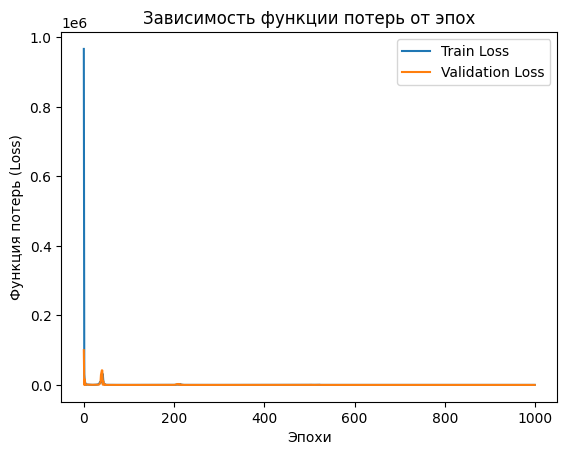

In [75]:
# Построение графика функции потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Зависимость функции потерь от эпох')
plt.xlabel('Эпохи')
plt.ylabel('Функция потерь (Loss)')
plt.legend()
plt.show()

In [76]:
def load_and_preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=1)  # Черно-белые изображения
    img = tf.image.resize(img, [64, 64])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.expand_dims(img, axis=0)  # Создание батча из одного изображения
    return img

# Пример пути к новому изображению
img_path = "C:/WORK_DIRECTORY/7_СЕМ/Курсовая работа 7 сем/TF_регрессия/datasets/dataset_1/"

for i in range(10):
    img = load_and_preprocess_image(img_path + str(i) + ".png")
    predictions = new_model.predict(img)
    print("Img ", i, "->", predictions)


1/1 [==============================] - 0s 32ms/step
Img  0 -> [[0.00163151]]
1/1 [==============================] - 0s 32ms/step
Img  1 -> [[1.0090123]]
1/1 [==============================] - 0s 25ms/step
Img  2 -> [[2.0074134]]
1/1 [==============================] - 0s 27ms/step
Img  3 -> [[2.9978428]]
1/1 [==============================] - 0s 29ms/step
Img  4 -> [[4.0345416]]
1/1 [==============================] - 0s 29ms/step
Img  5 -> [[4.9623566]]
1/1 [==============================] - 0s 36ms/step
Img  6 -> [[5.924572]]
1/1 [==============================] - 0s 30ms/step
Img  7 -> [[7.0362473]]
1/1 [==============================] - 0s 26ms/step
Img  8 -> [[8.175191]]
1/1 [==============================] - 0s 29ms/step
Img  9 -> [[8.808566]]


In [73]:
img_path = "C:/WORK_DIRECTORY/7_СЕМ/Курсовая работа 7 сем/TF_регрессия/datasets/dataset_1/test/9.5.png"
img = load_and_preprocess_image(img_path)
predictions = new_model.predict(img)
print(predictions)

1/1 [==============================] - 0s 30ms/step
[[8.948435]]


In [74]:
img_path = "C:/WORK_DIRECTORY/7_СЕМ/Курсовая работа 7 сем/TF_регрессия/datasets/dataset_1/train/9.png"
img = load_and_preprocess_image(img_path)
predictions = new_model.predict(img)
print(predictions)

1/1 [==============================] - 0s 28ms/step
[[8.808566]]
